In [1]:
import numpy as np
from math import sqrt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
def init_labels(l) :
    return [0 for _ in range(l)]

In [3]:
def find_neighbours(points, distFunc, p, eps) :
    l = len(points)
    neighbours = []
    for i in range(l) :
        d = distFunc(points[i], points[p])
#         print(points[i], points[p], d)
        if d <= eps and i != p :
            neighbours.append(i)
            
    return neighbours

In [4]:
def dbscan(points, distFunc, eps, minPts) :
    c = 0
    l = len(points)
    labels = init_labels(l)
    
    for p in range(l):
        if labels[p] != 0 :
            continue
            
        neighbours_to_p = find_neighbours(points, distFunc, p, eps)
        
        if len(neighbours_to_p) < minPts :
            labels[p] = -1
            continue
            
        c += 1
        labels[p] = c
        
        for q in neighbours_to_p :
            if labels[q] == -1 :
                labels[q] = c
            
            if labels[q] != 0 :
                continue
            
            labels[q] = c
            neighbours_to_q = find_neighbours(points, distFunc, q, eps)
            if len(neighbours_to_q) >= minPts :
                neighbours_to_p += neighbours_to_q 
        
    return labels      
        

In [5]:
def distance(p1, p2) :
    l = len(p1)
    d = 0
    
    for i in range(l) :
           d += (p1[i] - p2[i])**2
            
    return sqrt(d)

In [328]:
def generate_circle_of_radius(r1, r2, n) :
    r_min = min(r1, r2)
    dr = abs(r1 - r2)
    
    dr_rand = dr * np.sqrt(np.random.rand(n))
    theta = 2 * np.pi * np.random.rand(n)
    
    x = (r_min + dr_rand) * np.cos(theta)
    y = (r_min + dr_rand) * np.sin(theta)
    
    points = [[x[i], y[i]] for i in range(len(x))]
    
    return points
    

In [329]:
def generate_points_type_1(n=10000) :    
    r1 = (0, 2)
    r2 = (5, 7)
    r3 = (10, 12)
    
    a = r1[1]
    b = r2[1]
    c = r3[1]
    
    t = (a + b + c)    
    a /= t
    b /= t
    c /= t
    
    points_1 = generate_circle_of_radius(r1[0], r1[1], int(a*n))
    points_2 = generate_circle_of_radius(r2[0], r2[1], int(b*n))
    points_3 = generate_circle_of_radius(r3[0], r3[1], int(c*n))
    
    return points_1 + points_2 + points_3    

In [330]:
def plot_unclustered(points, ax) :
    df = pd.DataFrame(points, columns=['x', 'y'])
    sns.scatterplot(x='x', y='y', data=df, ax=ax, palette='bright')

In [331]:
def plot_clustered(points, labels, ax) :
    df = pd.DataFrame(points, columns=['x', 'y'])
    df['l'] = labels
    sns.scatterplot(x='x', y='y', data=df, hue='l', ax=ax, palette='bright')

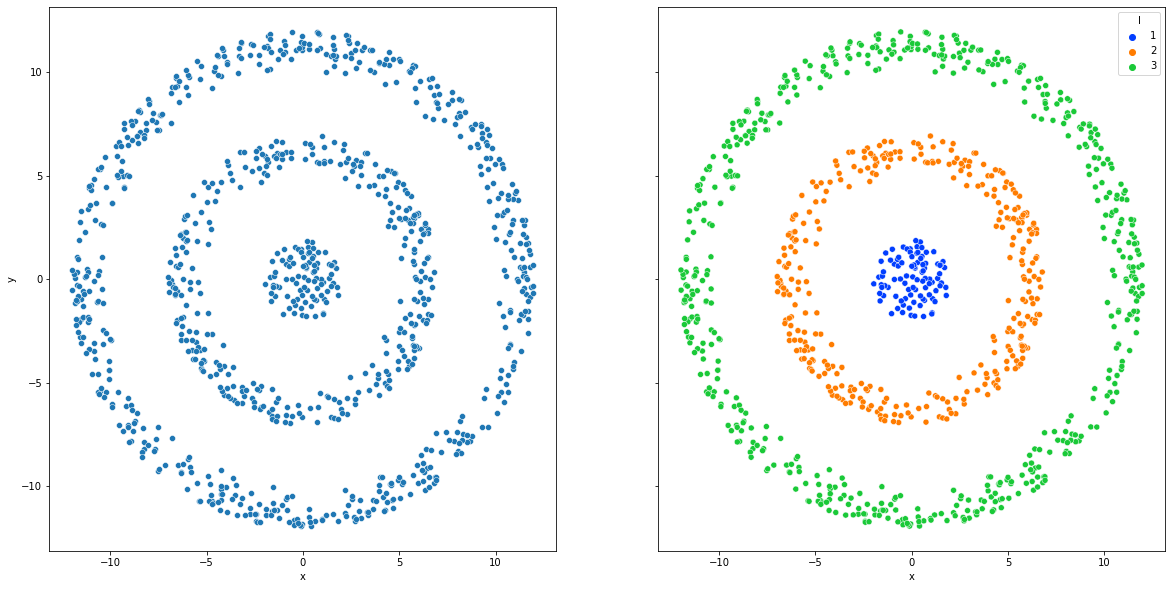

In [332]:
points_1 = generate_points_type_1(1000)

labels_1 = dbscan(points_1, distance, 1, 3)

fig, ax =plt.subplots(1,2, figsize=(20, 10), sharey=True)
plot_unclustered(points, ax[0])
plot_clustered(points, labels, ax[1])

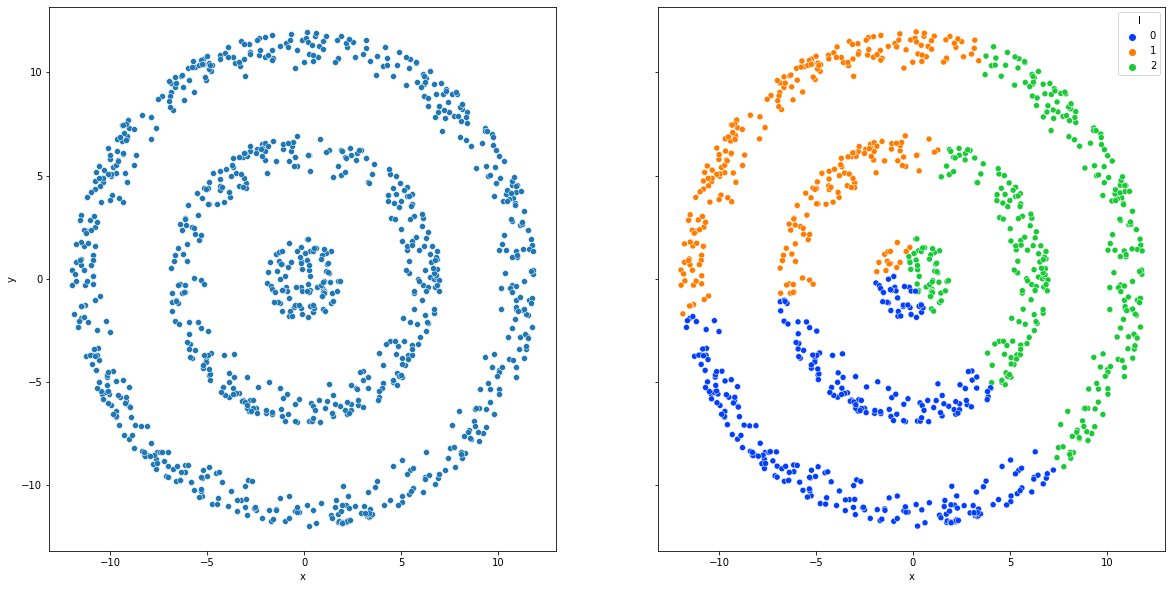

In [341]:
kmeans = KMeans(n_clusters=3).fit(points_1)
labels_3 = kmeans.labels_

fig, ax =plt.subplots(1,2, figsize=(20, 10), sharey=True)
plot_unclustered(points_1, ax[0])
plot_clustered(points_1, labels_3, ax[1])

# voronoi diagram

In [334]:
def generate_semicircle_of_radius(r1, r2, n, s, d) :
    r_min = min(r1, r2)
    dr = abs(r1 - r2)
    
    dr_rand = dr * np.sqrt(np.random.rand(n))
    theta = s*np.pi * np.random.rand(n)
    
    x = (r_min + dr_rand) * np.cos(theta)
    y = (r_min + dr_rand) * np.sin(theta)
    
    points = [[x[i]+d[0], y[i]+d[1]] for i in range(len(x))]
    
    return points

In [335]:
def generate_points_type_2(n=10000) :    
    r2 = (5, 7)
    r3 = (5, 7)
    
    b = r2[1]
    c = r3[1]
    
    t = (b + c)    
    b /= t
    c /= t

    points_1 = generate_semicircle_of_radius(r2[0], r2[1], int(b*n), -1, [7, 4])
    points_2 = generate_semicircle_of_radius(r3[0], r3[1], int(c*n), 1, [0, 0])
    
    return points_1 + points_2

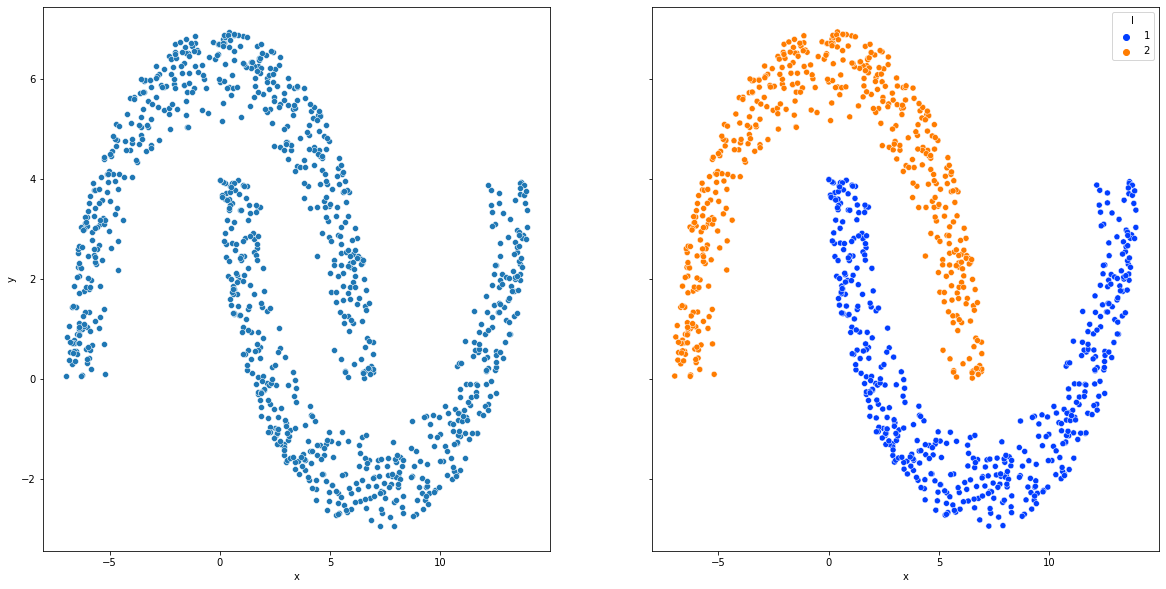

In [336]:
points_2 = generate_points_type_2(1000)
labels_2 = dbscan(points_2, distance, 1, 3)

fig, ax =plt.subplots(1,2, figsize=(20, 10), sharey=True)
plot_unclustered(points_2, ax[0])
plot_clustered(points_2, labels_2, ax[1])

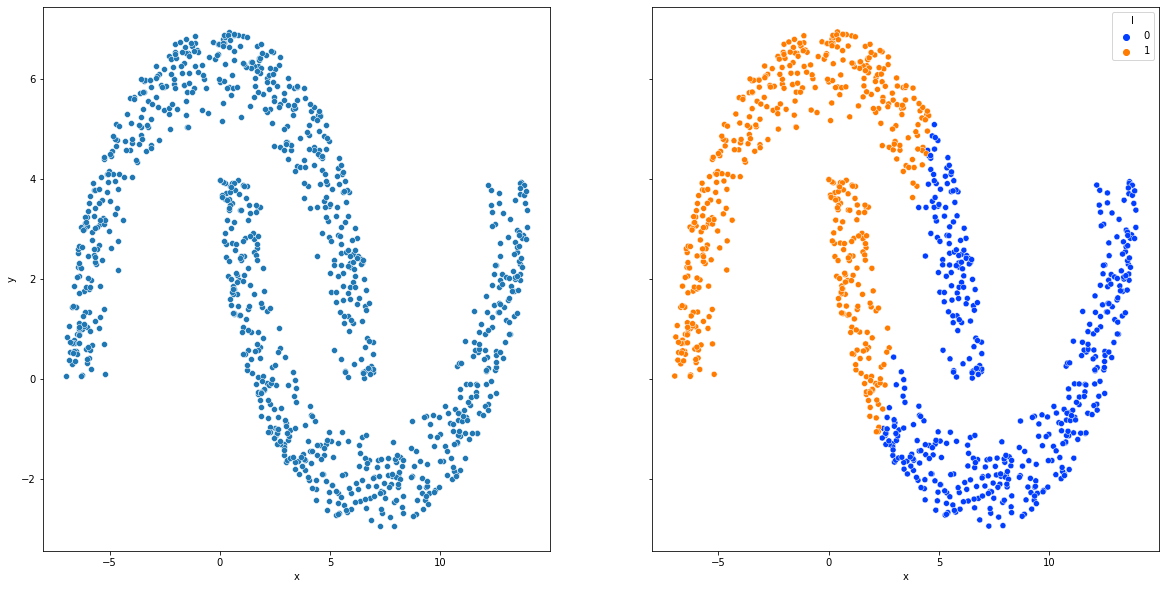

In [337]:
kmeans = KMeans(n_clusters=2).fit(points_2)
labels_4 = kmeans.labels_

fig, ax =plt.subplots(1,2, figsize=(20, 10), sharey=True)
plot_unclustered(points_2, ax[0])
plot_clustered(points_2, labels_4, ax[1])